# 신경망 모델

## 이진분류 : 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


- scale 값이 영향이 있는지 확인하기

In [5]:
df.shape

(569, 31)

### case1. 데이터 정규화 or 표준화 X

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target,
    test_size = 0.2, random_state = 2022
)

#### 모델 정의

In [8]:
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.layers import Dense       # Fully onnected Network

In [10]:
model = Sequential([
    Dense(100, input_shape = (30,), activation = 'relu'),   #입력층 함수는 relu
    Dense(24, activation = 'relu'),             # 은닉층 함수 relu
    Dense(1, activation = 'sigmoid')            # 출력층 함수는 시그모이드
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


#### 모델 설정(컴파일)

In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

#### 모델 학습

In [23]:
history = model.fit(X_train, y_train, validation_split= 0.2, epochs = 100, batch_size = 100)

Epoch 1/100
4/4 [==============================] - 1s 58ms/step - loss: 13.2296 - accuracy: 0.4368 - val_loss: 8.0837 - val_accuracy: 0.6484
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 5.2684 - accuracy: 0.6813 - val_loss: 1.2949 - val_accuracy: 0.5934
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 3.2038 - accuracy: 0.4698 - val_loss: 2.6705 - val_accuracy: 0.4835
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 1.1837 - accuracy: 0.7253 - val_loss: 1.0600 - val_accuracy: 0.8352
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 1.6099 - accuracy: 0.8214 - val_loss: 0.6665 - val_accuracy: 0.8791
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.5051 - accuracy: 0.9011 - val_loss: 0.8148 - val_accuracy: 0.8022
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9058 - accuracy: 0.7747 - val_loss: 0.4720 - val_accuracy: 0.8791
Epoch 8/100
4/4 [==

#### 모델 평가

In [24]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2761 - accuracy: 0.9035


[0.276083379983902, 0.9035087823867798]

#### 훈련과정 시각화 
- epoch에 따른 accuracy, val_loss변화

In [26]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

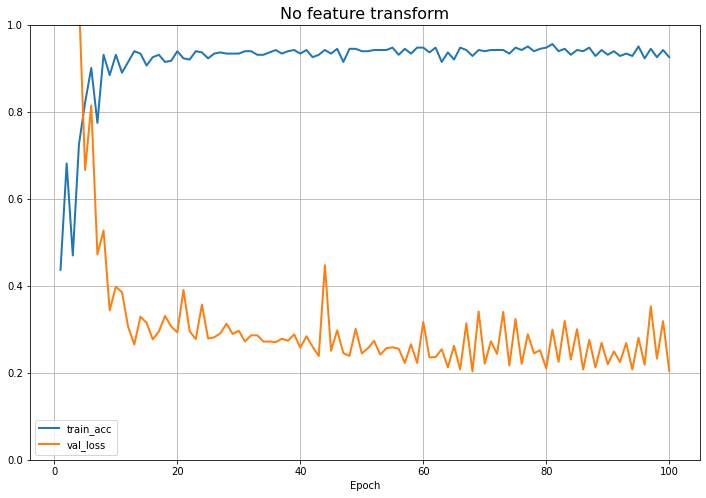

In [28]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, label = 'train_acc', lw = 2)
plt.plot(xs, y_vloss, label = 'val_loss', lw = 2)
plt.legend(); plt.grid()
plt.ylim([0,1])
plt.xlabel('Epoch')
plt.title('No feature transform', fontsize = 16)
plt.show()

### case2. 데이터 정규화, 표준화 함

In [29]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [31]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify = cancer.target,
    test_size = 0.2, random_state = 2022
)

#### 모델 정의

In [34]:
model2 = Sequential([
    Dense(100, input_shape = (30,), activation = 'relu'),   #입력층 함수는 relu
    Dense(24, activation = 'relu'),             # 은닉층 함수 relu
])
model2.add(Dense(1, activation = 'sigmoid'))            # 출력층 함수는 시그모이드)
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               3100      
                                                                 
 dense_13 (Dense)            (None, 24)                2424      
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


#### 모델 설정(컴파일)

In [35]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

#### 모델 학습

In [36]:
# validation_split      : 검증 데이터셋 비율
history = model2.fit(X_train2, y_train2, validation_split= 0.2, epochs = 100, batch_size = 100)

Epoch 1/100
4/4 [==============================] - 1s 95ms/step - loss: 0.5691 - accuracy: 0.7885 - val_loss: 0.4434 - val_accuracy: 0.8791
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.4069 - accuracy: 0.9121 - val_loss: 0.3477 - val_accuracy: 0.9121
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.3198 - accuracy: 0.9203 - val_loss: 0.2885 - val_accuracy: 0.9121
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2606 - accuracy: 0.9286 - val_loss: 0.2486 - val_accuracy: 0.9121
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.2208 - accuracy: 0.9341 - val_loss: 0.2193 - val_accuracy: 0.9121
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1917 - accuracy: 0.9341 - val_loss: 0.1977 - val_accuracy: 0.9121
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 0.1682 - accuracy: 0.9396 - val_loss: 0.1816 - val_accuracy: 0.9231
Epoch 8/100
4/4 [===

#### 모델 평가

In [40]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.9912


[0.037827204912900925, 0.9912280440330505]

#### 훈련과정 시각화 
- epoch에 따른 accuracy, val_loss변화

In [41]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

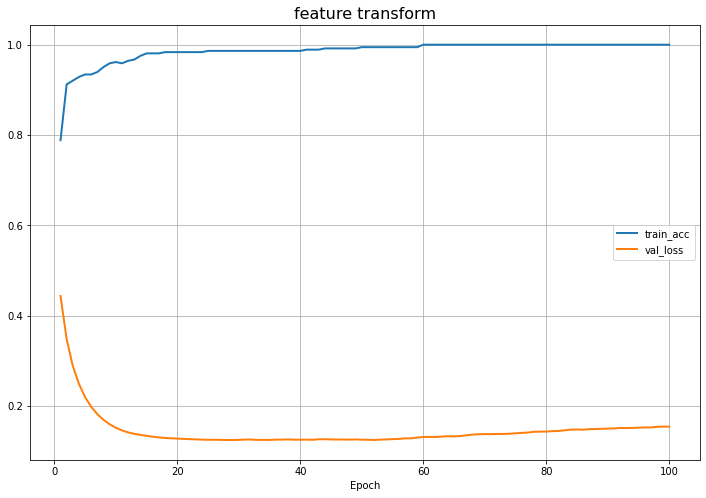

In [45]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, label = 'train_acc', lw = 2)
plt.plot(xs, y_vloss, label = 'val_loss', lw = 2)
plt.legend(); plt.grid()
plt.xlabel('Epoch')
plt.title('feature transform', fontsize = 16)
plt.show()